In [45]:
from pynq import Overlay
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from pynq import MMIO

In [50]:
overlay = Overlay("ultra96_bd_fir.bit")

In [51]:
IP_BASE_ADDRESS = 0x00B0000000
IP_HIGH_ADDRESS = 0x00B0000FFF
ADDRESS_RANGE = IP_HIGH_ADDRESS-IP_BASE_ADDRESS+1
fir8 = MMIO(IP_BASE_ADDRESS, ADDRESS_RANGE)

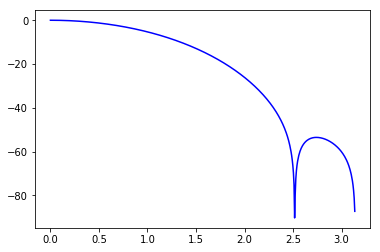

In [82]:
# FIR filter design
nTaps = 8; # FIR filter 8th order
fs = 10e3
fc = 3000
wc = fc/fs
taps = signal.firwin(nTaps, wc)
w,h = signal.freqz(taps)
plt.plot(w, 20 * np.log10(abs(h)), 'b')

In [83]:
# Filter quantification
nBits = 32

tapsQ = []
for i in taps:
    tapsQ.append(np.int(i*2**(nBits-1)))

In [84]:
coeffIndex = 0
for j in tapsQ:
    fir8.write(coeffIndex,j)
    coeffIndex = coeffIndex+4